## **Pandas Practice Task 2**

### **Problem Statement:** Analyzing Customer Purchase Behavior



#### Import Libraries


In [216]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [ ]:
# Load Excel file and convert it into csv file
dataset = pd.read_excel('online_retail.xlsx')
dataset.to_csv('online_retail.csv')

#### Load Dataset

In [218]:
# Now load the CSV file
dataset = pd.read_csv('online_retail.csv')
dataset.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Cleaning and Preprocessing

In [219]:
# Check where the data is strating and ending
dataset.index

RangeIndex(start=0, stop=541910, step=1)

In [220]:
dataset.describe()

,Unnamed: 0,Quantity,Price,Customer ID
count,541910.000000,541910.000000,541910.000000,406830.000000
mean,270954.500000,9.552234,4.611138,15287.684160
std,156436.086526,218.080957,96.759765,1713.603074
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.250000,1.000000,1.250000,13953.000000
50%,270954.500000,3.000000,2.080000,15152.000000
75%,406431.750000,10.000000,4.130000,16791.000000
max,541909.000000,80995.000000,38970.000000,18287.000000


In [221]:
# See the overview of dataset what things are present in our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541910 non-null  int64  
 1   Invoice      541910 non-null  object 
 2   StockCode    541910 non-null  object 
 3   Description  540456 non-null  object 
 4   Quantity     541910 non-null  int64  
 5   InvoiceDate  541910 non-null  object 
 6   Price        541910 non-null  float64
 7   Customer ID  406830 non-null  float64
 8   Country      541910 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [222]:
# Size of Dataset 
print("Number of instances: ", dataset.shape[0])
print("Number of attributes: ", dataset.shape[1])

Number of instances:  541910
Number of attributes:  9


#### Select a column on the basis of dtype


In [223]:
dataset.dtypes

Unnamed: 0       int64
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [224]:
# Drop a column named as Unnamed 0
dataset = dataset.drop(['Unnamed: 0'],axis="columns")
dataset.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [225]:
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### To see the Numeric and Object types

In [226]:
# Numeric Types
dataset.select_dtypes(include=['number']).head()

,Quantity,Price,Customer ID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0


In [227]:
# Object Types
dataset.select_dtypes(include=['object']).head()


,Invoice,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [228]:
# Category Types
dataset.select_dtypes(include=['category']).head()


""
0
1
2
3
4


In [229]:
# Date Types
dataset.select_dtypes(include=['datetime']).head()


""
0
1
2
3
4


### Description of Data

In [230]:
dataset.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [231]:
# Check Duplicates in the dataset
duplicate = dataset[dataset.duplicated()]
duplicate

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


#### Checking null values in dataset

In [232]:
len(dataset)

541910

In [233]:
# Check null values
dataset.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [234]:
# Check number of unique values
dataset.nunique()

Invoice        25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
Price           1630
Customer ID     4372
Country           38
dtype: int64

In [235]:
# Check each stock code has only one description
dataset.groupby('StockCode').apply(lambda x: x['Description'].unique())

StockCode
10002                          [INFLATABLE POLITICAL GLOBE , nan]
10080                      [GROOVY CACTUS INFLATABLE, nan, check]
10120                                              [DOGGY RUBBER]
10123C                               [HEARTS WRAPPING TAPE , nan]
10123G                                                      [nan]
                                      ...                        
gift_0001_20    [Dotcomgiftshop Gift Voucher £20.00, to push o...
gift_0001_30            [Dotcomgiftshop Gift Voucher £30.00, nan]
gift_0001_40                 [Dotcomgiftshop Gift Voucher £40.00]
gift_0001_50                 [Dotcomgiftshop Gift Voucher £50.00]
m                                                        [Manual]
Length: 4070, dtype: object

In [236]:
# Number of invoices for each country
dataset.groupby(['Country']).count() ['Invoice']

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8558
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


**Observations:**

From the data, we can see that:

- The minimum price and quantity are negative, and this is impossible.
- There are null values in CustomerID and Description columns.
- Some Stock Codes are not a 5-digit integral number.
- Some Stock Codes has more than one item description.

In [237]:
dataset = dataset.rename(columns={'Customer ID': 'Customer_ID'})

In [238]:
# Delete rows with null values
dataset = dataset.dropna(subset=['Customer_ID'])

# Check null values
dataset.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
dtype: int64

In [240]:
dataset.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer_ID    float64
Country         object
dtype: object

In [241]:
cancel_transaction = dataset[dataset['Invoice'].astype(str).str.contains('C')]
cancel_transaction.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [243]:
print("Number of cancelled transactions: ", len(cancel_transaction))
print("Total number of transaction with negative quantity:", dataset[dataset['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions:  8905
Total number of transaction with negative quantity: 8905


In [244]:
dataset[dataset['Price'] == 0].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [249]:
dummy = dataset[~dataset['Invoice'].astype(str).str.contains('C')]  
print("Number of of transactions with negative quantity value among non cancelled transactions:" ,len(dummy[dummy['Quantity']<=0]))
print("Number of of transactions with zero price and negative quantity" ,len(dummy[(dummy['Quantity']<=0) & (dummy['Price'] == 0)]))


print("Percentage of cancelled transactions:" , round(len(cancel_transaction)/len(dataset)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(dataset[dataset['Price']<=0])/len(dataset)*100, 2),"%")

Number of of transactions with negative quantity value among non cancelled transactions: 0
Number of of transactions with zero price and negative quantity 0
Percentage of cancelled transactions: 2.19 %
Precentage of transactions with zero or negative price 0.01 %


In [250]:
data = dataset[(dataset['Price'] > 0) & (dataset['Quantity']>0)]


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397885 non-null  object 
 1   StockCode    397885 non-null  object 
 2   Description  397885 non-null  object 
 3   Quantity     397885 non-null  int64  
 4   InvoiceDate  397885 non-null  object 
 5   Price        397885 non-null  float64
 6   Customer_ID  397885 non-null  float64
 7   Country      397885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


### Check Duplicates 

In [252]:
print(len(data[data.duplicated()]))


5192


In [253]:
data.drop_duplicates(inplace = True)


/tmp/ipykernel_31980/2388208607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)


In [254]:
data = data.dropna(subset=['Customer_ID'])


### Check Null values

In [255]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
dtype: int64

### Explore each Attreibute

**Item Description**

In [256]:
data['Description'] = data['Description'].str.lower()
print("Number of unique descriptions: ", len(data['Description'].unique().tolist()))
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True) 
print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions:  3877
Number of unique descriptions: 3867


**StockCode**

In [257]:
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]
len(data['StockCode'].unique().tolist())

3659

**DateTime**

In [260]:
data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')

In [261]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))
data['hour'] = data['InvoiceDate'].dt.hour
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,month,year,WeekDay,month_year,hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8


In [262]:
data['total_ammount_sales'] = data['Price'] * data['Quantity']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Invoice              391150 non-null  object        
 1   StockCode            391150 non-null  object        
 2   Description          391150 non-null  object        
 3   Quantity             391150 non-null  int64         
 4   InvoiceDate          391150 non-null  datetime64[ns]
 5   Price                391150 non-null  float64       
 6   Customer_ID          391150 non-null  float64       
 7   Country              391150 non-null  object        
 8   month                391150 non-null  int64         
 9   year                 391150 non-null  int64         
 10  WeekDay              391150 non-null  object        
 11  month_year           391150 non-null  datetime64[ns]
 12  hour                 391150 non-null  int64         
 13  total_ammount_

<Figure size 1080x576 with 0 Axes>

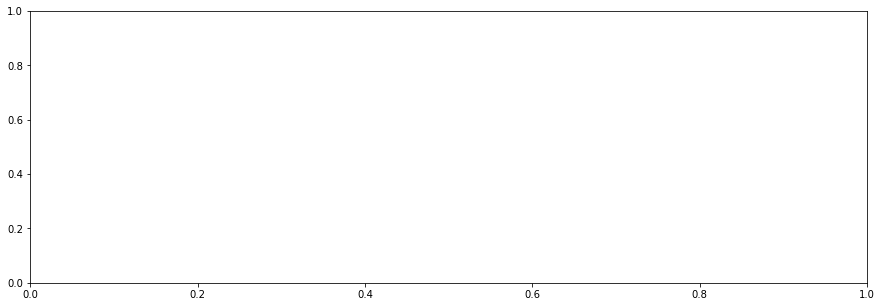

In [290]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))

fig, ax = plt.subplots(figsize=(15, 5))

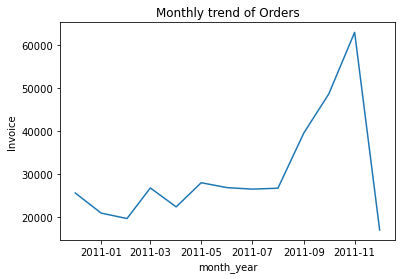

In [299]:
plot = pd.DataFrame(data.groupby(['month_year'])['Invoice'].count()).reset_index()
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['Invoice'].count())
plot3 = pd.DataFrame(data.groupby(['hour'])['Invoice'].count()).reset_index()
plot4 = pd.DataFrame(data.groupby(['month_year'])['total_ammount_sales'].mean()).reset_index()
plot5 = pd.DataFrame(data.groupby(['month_year'])['total_ammount_sales'].sum()).reset_index()
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
plo = sns.lineplot(x="month_year", y="Invoice", data = plot).set(title='Monthly trend of Orders')


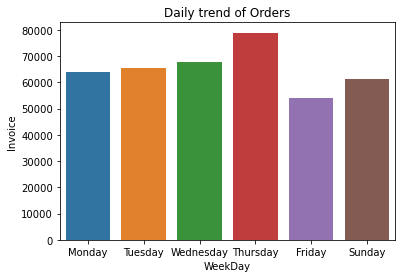

In [300]:
ax = sns.barplot(x="WeekDay", y="Invoice", data = plot2).set(title='Daily trend of Orders')


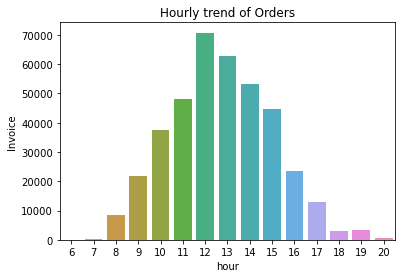

In [301]:
ax = sns.barplot(x="hour", y="Invoice", data = plot3).set(title='Hourly trend of Orders')


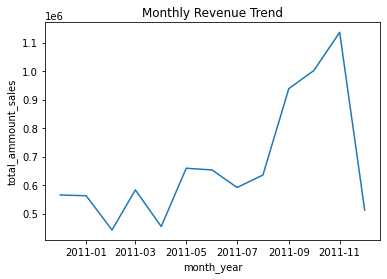

In [303]:
ax = sns.lineplot(x = 'month_year', y='total_ammount_sales', data = plot5).set(title='Monthly Revenue Trend')


**Observations**

- At the end of year, purchasing is higher.
- Shopping rate on weekend is relatively higher as compared to week days.
- People rush towards shopping after noon.
- Revenue generated in last months of year is greater because of high shopping rate.

**Price**

In [304]:
item = data[data['Price']>50]['Description'].unique().tolist()


In [306]:
print("Items greater than 50% consumption: ", len(item))


Items greater than 50% consumption:  10


**Country** 

In [308]:
print("Transactions made in", len(data['Country'].unique().tolist()), "countries")


Transactions made in 37 countries


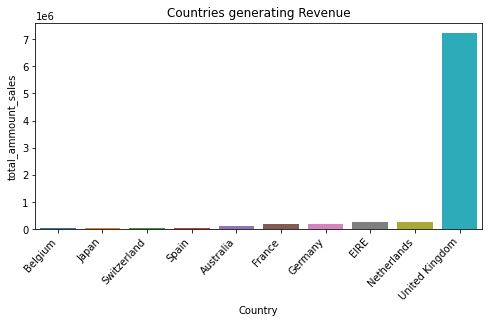

In [311]:
plot6 = pd.DataFrame(data.groupby(['Country'])['total_ammount_sales'].sum()).reset_index()
plot6 = plot6.sort_values(['total_ammount_sales']).reset_index(drop=True)
plot7 = pd.DataFrame(data.groupby(['Country'])['total_ammount_sales'].count()).reset_index()
plot7 = plot7.sort_values(['total_ammount_sales']).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(8, 3.8)
ax = sns.barplot(x = 'Country', y='total_ammount_sales', data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.title("Countries generating Revenue")
plt.show()

In [312]:
df_uk = data[data['Country'] == "United Kingdom"]
df_uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,month,year,WeekDay,month_year,hour,total_ammount_sales
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34


In [313]:
import datetime as dt
presence = dt.datetime(2011,12,10)
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

/tmp/ipykernel_31980/2802060990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])


In [317]:
rfm = df_uk.groupby('Customer_ID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'Invoice': lambda x: len(x), 'total_ammount_sales': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'Invoice': 'frequency', 
                         'total_ammount_sales': 'monetary_value'}, inplace=True)
rfm.head()

,recency,frequency,monetary_value
Customer_ID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4397,31650.78
12749.0,3,198,4040.88
12820.0,3,59,942.34


In [318]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

rfm_segments= rfm

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer_ID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4397,31650.78,1,1,1,111
12749.0,3,198,4040.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [319]:
print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print("______________________________ \n")
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("______________________________ \n")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("______________________________ \n")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print("______________________________ \n")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)") 


Champions:  407 ( 10.39 %)
______________________________ 

Loyal Customers:  967 ( 24.69 %)
______________________________ 

Big Spenders:  979 ( 25.0 %)
______________________________ 

About to Sleep:  147 ( 3.75 %)
______________________________ 

Lost Customers:  340 ( 8.68 %)
